# Week 3

## Part 1: Small world networks

**What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?**
<br>
The problem is that random networks underestimates the size and the frequency of the higher nodes as well as for lower nodes. Random networks assumes that as the dregree of the network increases, so the number of nodes, but in real-world networks the graph only becomes more interconnected and therefore are less disparse.

**List the four regimes that characterize random networks as a function of $\langle k \rangle$.**
<br>
- Subcritical regime: $0 < <k> < 1$
- Critical point: $<k> = 1$
- Supercritical regime: $<k> > 1$
- Connected regime: $<k> = lnN$

**According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?**
<br>
Random network model does not capture the clustering of real networks. Instead real networks have a much higher clustering coefficient than expected for a random network of similar N and L. An extension of the random network model proposed by Watts and Strogatz [29] addresses the coexistence of high ‹C› and the small world property (BOX 3.9). It fails to explain, however, why high-degree nodes have a smaller clustering coefficient than low-degree nodes. Models explaining the shape of C(k) are discussed in Chapter 9.

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

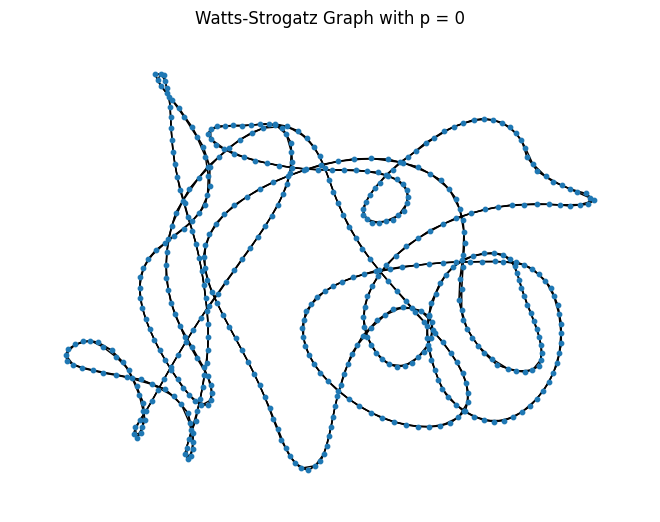

Average clustering coefficient for p = 0: 0.5
Average shortest path length for p = 0: 62.875751503006015


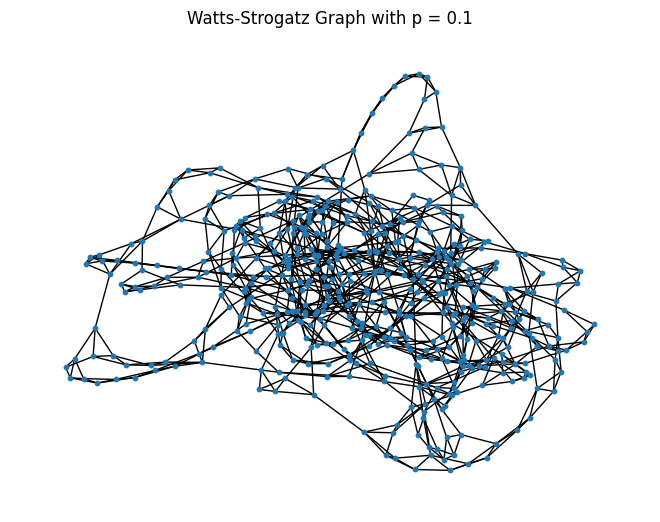

Average clustering coefficient for p = 0.1: 0.36373333333333335
Average shortest path length for p = 0.1: 7.653210420841684


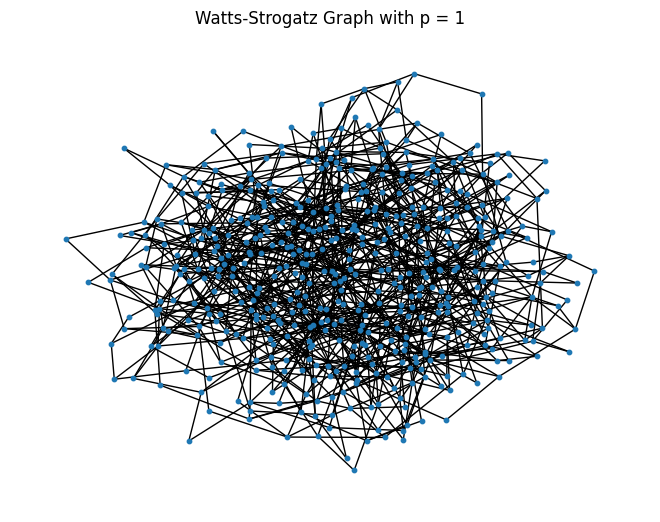

Average clustering coefficient for p = 1: 0.005161904761904762
Average shortest path length for p = 1: 4.774404809619239


In [3]:
# Defining graphs
N = 500
k = 4
p = [0, 0.1, 1]

# Generate a graph for each p value with watts_strogatz_graph
for i in range(3):
    G = nx.watts_strogatz_graph(N, k, p[i])
    # Plot the graph
    plt.figure()
    nx.draw(G, node_size=10)
    plt.title('Watts-Strogatz Graph with p = ' + str(p[i]))
    plt.show()
    # Print the average clustering coefficient
    print('Average clustering coefficient for p = ' + str(p[i]) + ': ' + str(nx.average_clustering(G)))
    # Print the average shortest path length
    print('Average shortest path length for p = ' + str(p[i]) + ': ' + str(nx.average_shortest_path_length(G)))

When p = 1 the network starts being more connected, therefore the average shortest path is smaller for this value, having a network similar to a giant component.

In [14]:
N = 500
k = 4
p = np.arange(0, 1.1, 0.1)

# Generate a graph for each p value with watts_strogatz_graph
for i in range(11):
    G = nx.watts_strogatz_graph(N, k, p[i])
    # Print the average shortest path length
    print('Average shortest path length for p = ' + str(p[i]) + ': ' + str(nx.average_shortest_path_length(G)))

    # DOES NOT WORK
    # Fully randomized network
    # R = nx.erdos_renyi_graph(N, p[i])
    # # 2. Randomly select two nodes
    # node1 = random.choice(list(R.nodes))
    # node2 = random.choice(list(R.nodes))

    # # Ensure the nodes are different and a path exists between them
    # while node1 == node2 or not nx.has_path(R, node1, node2):
    #     node2 = random.choice(list(G.nodes))

    # # 3. Find the shortest path between the two nodes
    # shortest_path = nx.shortest_path_length(G, source=node1, target=node2)
    # # Print the shortest path length
    # print('Shortest path length for p = ' + str(p[i]) + ' (randomized): ' + str(shortest_path))

Average shortest path length for p = 0.0: 62.875751503006015
Average shortest path length for p = 0.1: 8.166436873747495
Average shortest path length for p = 0.2: 6.027102204408818
Average shortest path length for p = 0.30000000000000004: 5.6164088176352704
Average shortest path length for p = 0.4: 5.1774749498998
Average shortest path length for p = 0.5: 5.017891783567134
Average shortest path length for p = 0.6000000000000001: 4.850012024048096
Average shortest path length for p = 0.7000000000000001: 4.814052104208417
Average shortest path length for p = 0.8: 4.772681362725451
Average shortest path length for p = 0.9: 4.768104208416833
Average shortest path length for p = 1.0: 4.751695390781563


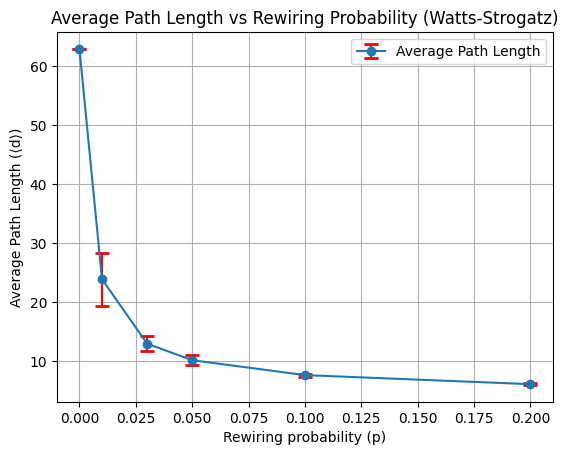

In [16]:
N = 500
k = 4
p = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

# Initialize lists to store results
avg_distances = []
std_distances = []

for pi in p:
    distances = []

    for i in range(50):
        # Generate a Watts-Strogatz small-world network
        G = nx.watts_strogatz_graph(N, k, pi)
        
        # Ensure the graph is connected
        if nx.is_connected(G):
            # Calculate the average path length
            avg_distance = nx.average_shortest_path_length(G)
            distances.append(avg_distance)
    
    # Calculate the mean and standard deviation of the path lengths for this p
    avg_distances.append(np.mean(distances))
    std_distances.append(np.std(distances))

# 4. Plotting with error bars
plt.errorbar(p, avg_distances, yerr=std_distances, fmt='-o', capsize=5, capthick=2, ecolor='red', label='Average Path Length')

plt.xlabel('Rewiring probability (p)')
plt.ylabel('Average Path Length (⟨d⟩)')
plt.title('Average Path Length vs Rewiring Probability (Watts-Strogatz)')
plt.grid(True)
plt.legend()
plt.show()

## Part 2: Scale-free networks

*A scale-free network is a network whose degree distribution follows a power law.*
<br>

**What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).**
<br>
- **Anomalous regime**: γ <= 2, no large networks can exist here. The number of links connected to the largest hub grows faster than the size of the network.
- **Scale-free regime**: 2 < γ < 3,  first moment of the degree distribution is finite but the second and higher moments diverge, therefore networks in this regime are ultra-small.
- **Random regime**: γ > 3, the first and the second moments are finite. For all practical purposes the properties of a scale-free network in this regime are difficult to distinguish from the properties a random network of similar size.


**What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.**
<br>
- **Sublinear Preferential Attachment** (0 < α < 1): The degree distribution follows the stretched exponential, resulting in fewer and smaller hubs than in a scale-free network. As α → 1 the cutoff length increases and pk follows a power law over an increasing range of degrees.
- **Linear Regime** (α=1): This corresponds to the Barabási-Albert model, hence the degree distribution follows a power law.
- **Superlinear Preferential Attachment** (α > 1): The high-degree nodes are disproportionately attractive. A winner-takes-all dynamics leads to a hub-and-spoke topology. In this configuration the earliest nodes become super hubs and all subsequent nodes link to them. 

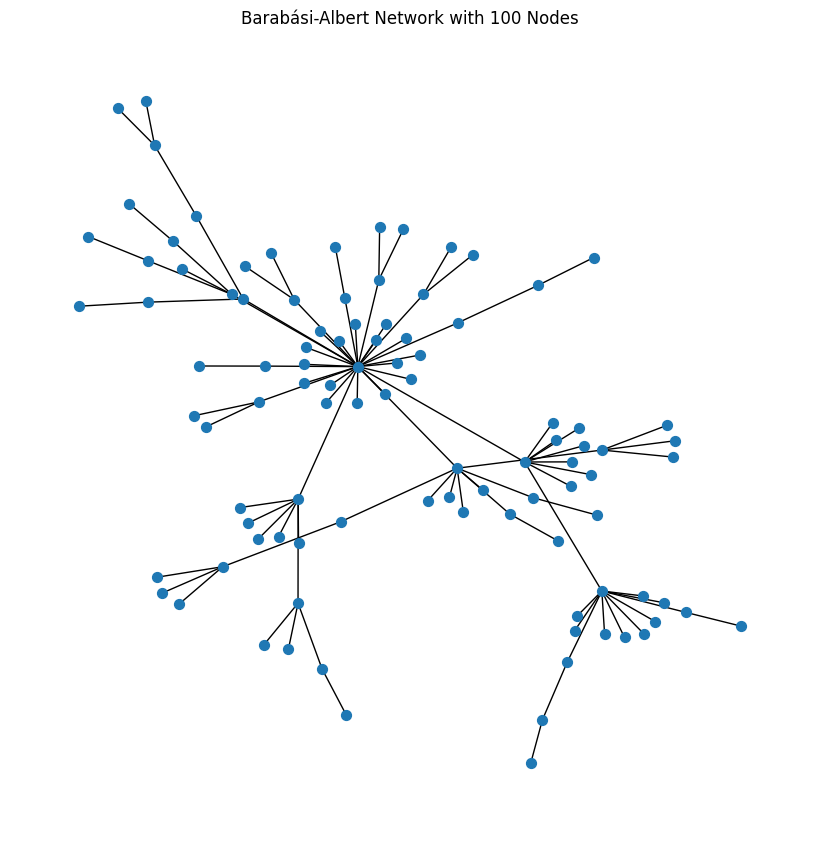

Maximum degree: 187
Minimum degree: 1


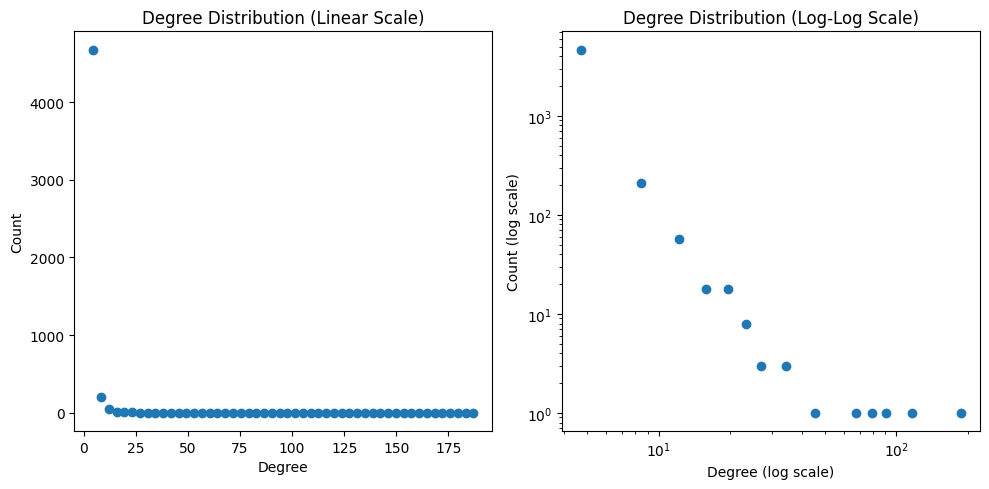

In [27]:
# Create a graph
BA = nx.Graph()

# Create a single link
BA.add_edge(0, 1)

# Function to add a node with preferential attachment
def add_node_with_preferential_attachment(G):
    # Create a list of nodes where nodes appear proportional to their degree
    nodes = list(G.nodes)
    node_list = []
    for node in nodes:
        # Append each node by the number of times equal to its degree
        node_list.extend([node] * G.degree[node])

    # Randomly choose a node to connect to from this list (preferential attachment)
    new_node = len(G.nodes)
    connected_node = random.choice(node_list)
    G.add_edge(new_node, connected_node)

# Add 100 nodes with preferential attachment
while len(BA.nodes) < 100:
    add_node_with_preferential_attachment(BA)

# Plot the network after 100 nodes
plt.figure(figsize=(8, 8))
nx.draw(BA, node_size=50, with_labels=False)
plt.title("Barabási-Albert Network with 100 Nodes")
plt.show()

# Add till 5000 nodes
while len(BA.nodes) < 5000:
    add_node_with_preferential_attachment(BA)

# Find the maximum and minimum degree
degrees = dict(BA.degree()).values()
max_degree = max(degrees)
min_degree = min(degrees)
print(f"Maximum degree: {max_degree}")
print(f"Minimum degree: {min_degree}")

# Bin the degree distribution using numpy.histogram
degree_sequence = sorted([d for n, d in BA.degree()], reverse=True)  # degree sequence
hist, bin_edges = np.histogram(degree_sequence, bins=50)

# Plot the degree distribution
plt.figure(figsize=(10, 5))

# Linear scale plot
plt.subplot(1, 2, 1)
plt.scatter(bin_edges[1:], hist, marker='o', linestyle='None')
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Degree Distribution (Linear Scale)")

# Log-log scale plot
plt.subplot(1, 2, 2)
plt.loglog(bin_edges[1:], hist, marker='o', linestyle='None')
plt.xlabel("Degree (log scale)")
plt.ylabel("Count (log scale)")
plt.title("Degree Distribution (Log-Log Scale)")

plt.tight_layout()
plt.show()

In [29]:
count = 0
for j in range(1000):
    # Get a random node from BA
    i = random.choice(list(BA.nodes))

    # Get the node degree
    degree = BA.degree[i]

    # Get the neighbors of the node
    neighbors = list(BA.neighbors(i))

    # Calculate average degree of the neighbors
    avg_degree = np.mean([BA.degree[n] for n in neighbors])

    # Print the results
    # print(f"Node {i} has degree {degree}")
    # print(f"Node {i} has neighbors {neighbors}")
    # print(f"Node {i} has neighbors with average degree {avg_degree}")

    if degree < avg_degree:
        count += 1

# Print F-BA paradox count
print(f"Number of times the F-BA paradox occurs: {count}")

Number of times the F-BA paradox occurs: 862


### Friendship paradox B

*What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 2$? Will the fraction of times the paradox is true be higher or lower?*
<br>
<br>
**First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?**
<br>
When 𝛾 = 2, the power-law distribution is flatter, which means the friendship paradox will be more prevalent because high-degree nodes (hubs) are more common and more likely to be selected as friends. Conversely, as γ increases, the paradox becomes less prevalent because the distribution favors low-degree nodes.


In [32]:
# Parameters for power-law distribution
alpha = 2  # Power-law exponent
x_min = 1   # Minimum degree
num_nodes = 5000  # Number of nodes

# Generate a power-law degree sequence
def generate_power_law_sequence(alpha, x_min, size):
    # Generate uniformly distributed random numbers
    r = np.random.uniform(0, 1, size)
    # Transform to get power-law distributed degrees
    degrees = x_min * (1 - r) ** (-1 / (alpha - 1))
    # Round to integers
    degrees = np.round(degrees).astype(int)
    return degrees

# Generate degree sequence
degree_sequence = generate_power_law_sequence(alpha, x_min, num_nodes)

# Ensure the sum of the degree sequence is even
if np.sum(degree_sequence) % 2 != 0:
    # If sum is odd, add 1 to a random degree to make it even
    degree_sequence[np.random.randint(0, num_nodes)] += 1

# Create the network using the configuration model
BAF = nx.configuration_model(degree_sequence)

# Remove self-loops and parallel edges
BAF = nx.Graph(BAF)  # Convert to simple graph
BAF.remove_edges_from(nx.selfloop_edges(BAF))


In [33]:
count = 0
for j in range(1000):
    # Get a random node from BA
    i = random.choice(list(BAF.nodes))

    # Get the node degree
    degree = BAF.degree[i]

    # Get the neighbors of the node
    neighbors = list(BAF.neighbors(i))

    # Calculate average degree of the neighbors
    avg_degree = np.mean([BAF.degree[n] for n in neighbors])

    # Print the results
    # print(f"Node {i} has degree {degree}")
    # print(f"Node {i} has neighbors {neighbors}")
    # print(f"Node {i} has neighbors with average degree {avg_degree}")

    if degree < avg_degree:
        count += 1

# Print F-BA paradox count
print(f"Number of times the F-BA flatter paradox occurs: {count}")

Number of times the F-BA flatter paradox occurs: 976


**Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?**
<br>
Yes before the paradox occurs aroun 86% of the times and now the value is up to 97%.